# Stats701 Homework 7, Winter 2018
### Mengyi Yuan
#### wendymy@umich.edu

### Problem 1: Warmup: constructing pandas objects
Problem 1 took me 30 minutes.

In [1]:
import pandas as pd
import numpy as np
from string import ascii_lowercase
%matplotlib inline

In [2]:
# 1.1
a = pd.Series([2, 3, 5, 7, 11, 13, 17, 19, 23, 29],
             index=list(ascii_lowercase[0:10]))

In [3]:
# 1.2
arrs = [['goat','goat','goat','goat','bird','bird','bird','bird','llama','llama','llama','llama'],
        ['A','A','a','a','A','A','a','a','A','A','a','a'],
        ['A','a','A','a','A','a','A','a','A','a','A','a']]
index = pd.MultiIndex.from_arrays(arrs, names=['animal','parent1','parent2'])
b = pd.DataFrame({'score1':[1,2,3,4,5,6,7,8,9,10,11,12],
              'score2':[2,4,4,6,6,8,8,10,10,12,12,14]},
              index=index)

### Problem 2: Working with pandas DataFrames
Problem 2 took me 45 minutes.

In [4]:
# 2.1
iris = pd.read_csv('iris.csv')
iris.shape

(150, 5)

In [5]:
iris.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

In [6]:
iris.columns.tolist()

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species']

In [7]:
len(iris['Species'].unique())

3

There are 150 data points in this data set. The column names are 'Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species'. The types of the columns are `float64` for Sepal.Length, Speal.Width, Petal.Length and Petal.Width and `object` for Species. There are 3 species of flower included in the data: setosa, versicolor and virginica. 

In [8]:
# 2.2
iris.iloc[34,3] = 0.2
iris.iloc[37,1] = 3.6
iris.iloc[37,2] = 1.4

In [9]:
# 2.3
iris['Petal.Ratio'] = iris['Petal.Length'] / iris['Petal.Width']
iris['Sepal.Ratio'] = iris['Sepal.Length'] / iris['Sepal.Width']

In [10]:
# 2.4
iris.to_csv('iris_corrected.csv')

In [11]:
# 2.5
iris.groupby('Species').agg({'Petal.Ratio':['mean','median','min','max','std'],
          'Sepal.Ratio':['mean','median','min','max','std']})

Petal.Ratio                                     Sepal.Ratio  \
                  mean    median       min   max       std        mean   
Species                                                                  
setosa        6.908000  7.000000  2.666667  15.0  2.854545    1.470188   
versicolor    3.242837  3.240385  2.666667   4.1  0.312456    2.160402   
virginica     2.780662  2.666667  2.125000   4.0  0.407367    2.230453   

                                                    
              median       min       max       std  
Species                                             
setosa      1.463063  1.268293  1.956522  0.118750  
versicolor  2.161290  1.764706  2.818182  0.228658  
virginica   2.169540  1.823529  2.961538  0.246992

### Problem 3: Plotting pands DataFrames
Problem 3 took me 90 minutes.

Text(0.5,0.98,'Boxplot of Petal and Sepal Ratio by Species')

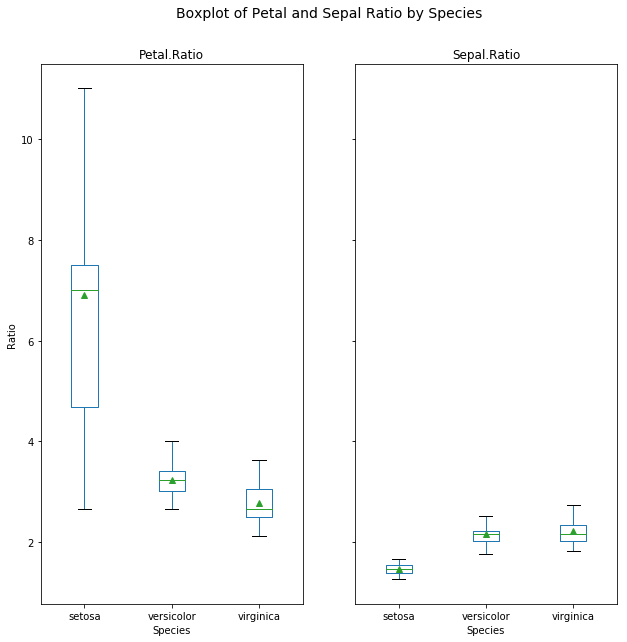

In [12]:
# 3.1
import matplotlib.pyplot as plt
(axes,lines) = iris.boxplot(column=['Petal.Ratio','Sepal.Ratio'],
                  by='Species',grid=False,
                  showfliers=False,showmeans=True,
                  figsize=(10,10))
axes.set(ylabel='Ratio',xlabel='Species')
plt.suptitle("Boxplot of Petal and Sepal Ratio by Species",fontsize=14)

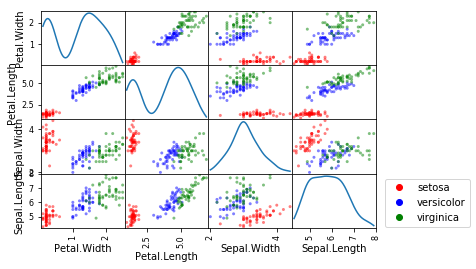

In [19]:
from pandas.plotting import scatter_matrix
color_map = dict(zip(list(iris['Species'].unique()),['red','blue','green']))
colors = iris['Species'].apply(lambda group: color_map[group])
scatter_matrix(iris[['Petal.Width','Petal.Length','Sepal.Width','Sepal.Length']],
              c=colors,diagonal='kde')
markers = [plt.Line2D([0,0],[0,0],color=color,marker='o',linestyle='') for color in color_map.values()]
plt.legend(markers,color_map.keys(),numpoints=1,bbox_to_anchor=(1.05,1),loc=2)